In [1]:
#https://ai-techsystems.com/ 
#(Affiliation: Author)

#import required libraries and functions
import matplotlib.pyplot as plt
import os
import cv2
import keras 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Activation,Dropout
import seaborn as sb


Using TensorFlow backend.


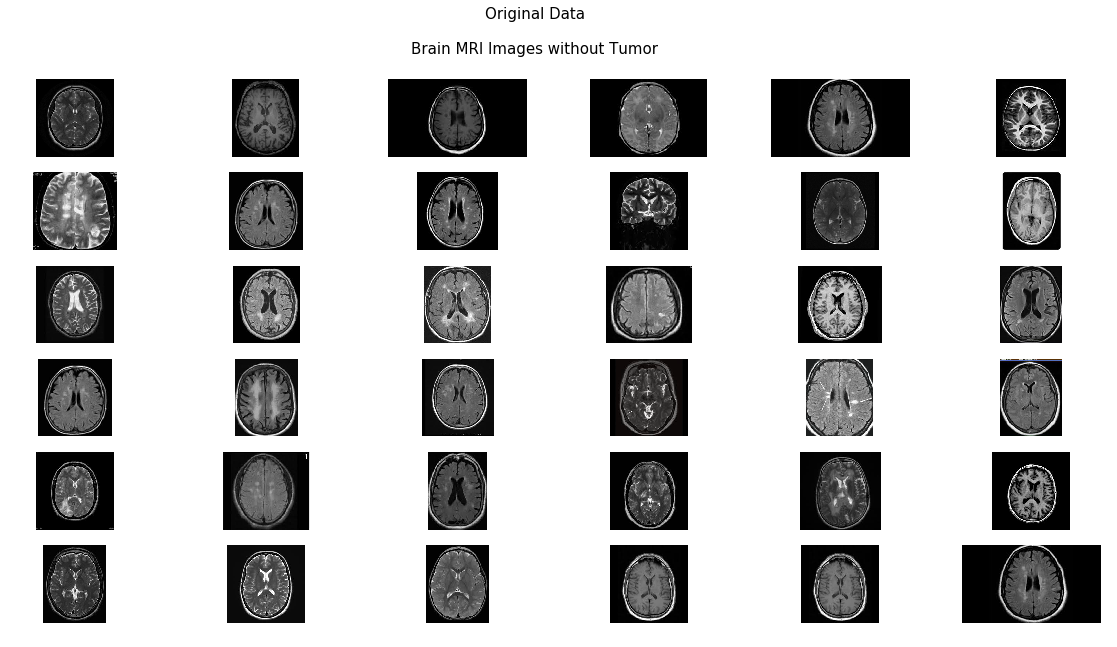

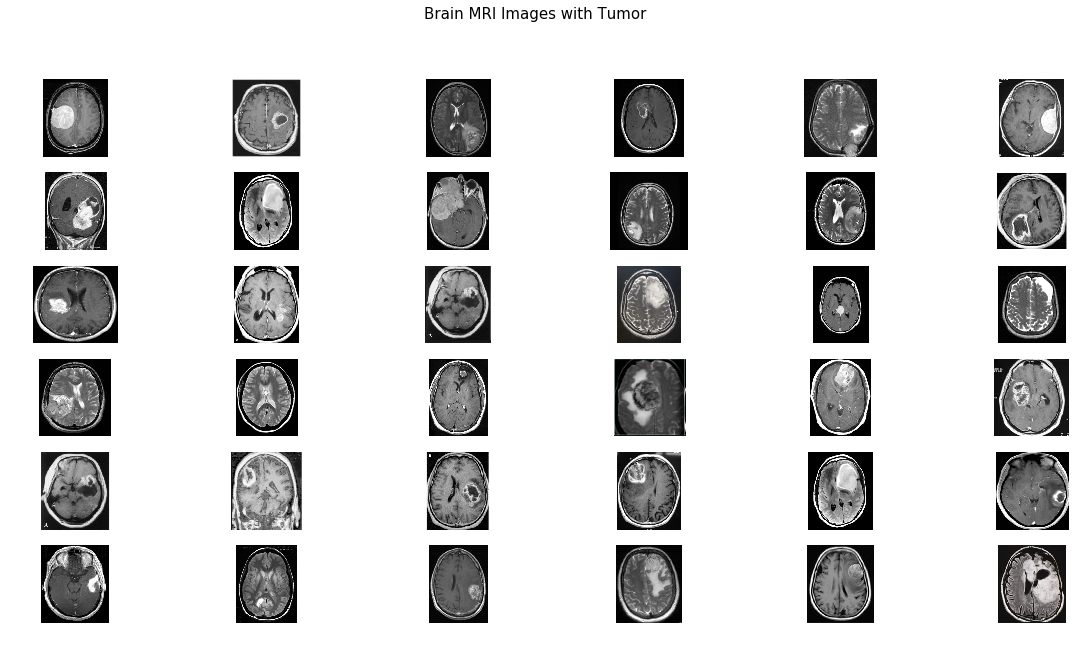

In [2]:
aug=[10,20]

#The two categories present in our dataset
categories=['no','yes']

#Display some of the images from the original dataset
for category in categories:
    win=plt.figure(figsize=(20,10))
    if category=='no':
        win.suptitle("Original Data\n\nBrain MRI Images without Tumor", fontsize=15)
    else:
        win.suptitle("Brain MRI Images with Tumor", fontsize=15) 
    index=1
    for img in os.listdir(os.path.join("Original_Data",category)):
        image=cv2.imread(os.path.join("Original_Data",category,img))
        try:
            win.add_subplot(6,6,index)
            plt.imshow(image)
            plt.axis('off')
            index=index+1
        except:
            break
    plt.show()


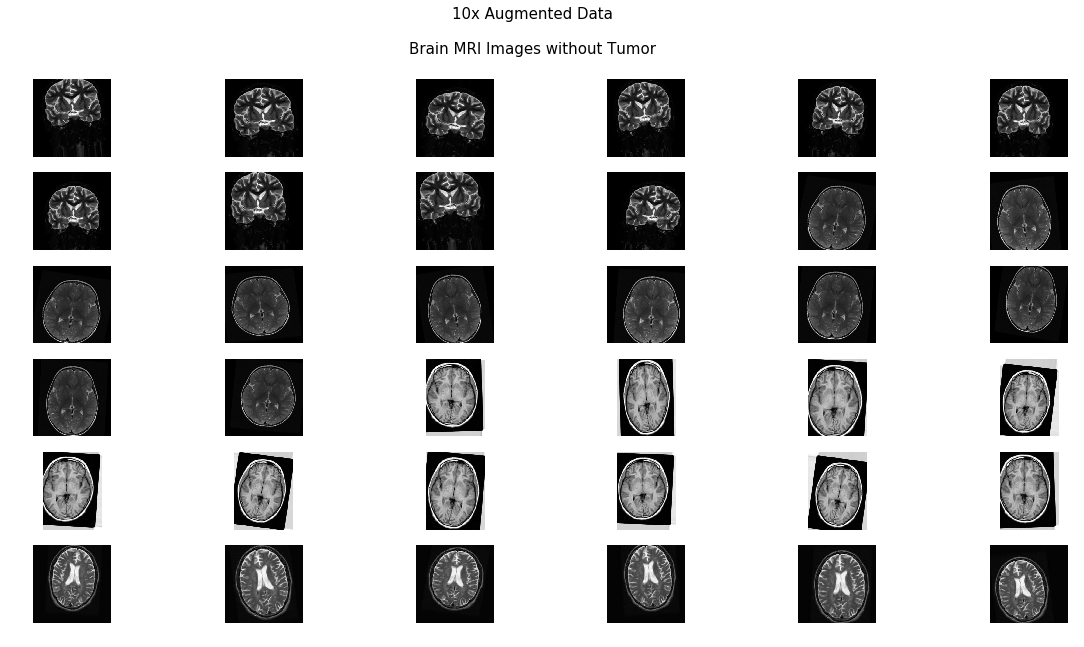

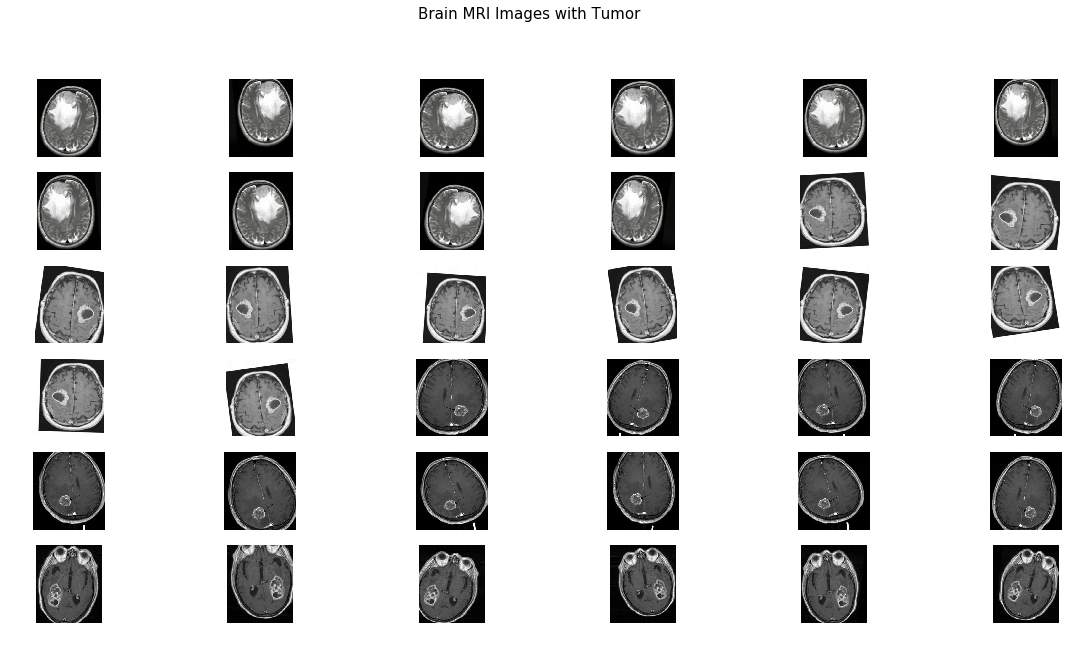

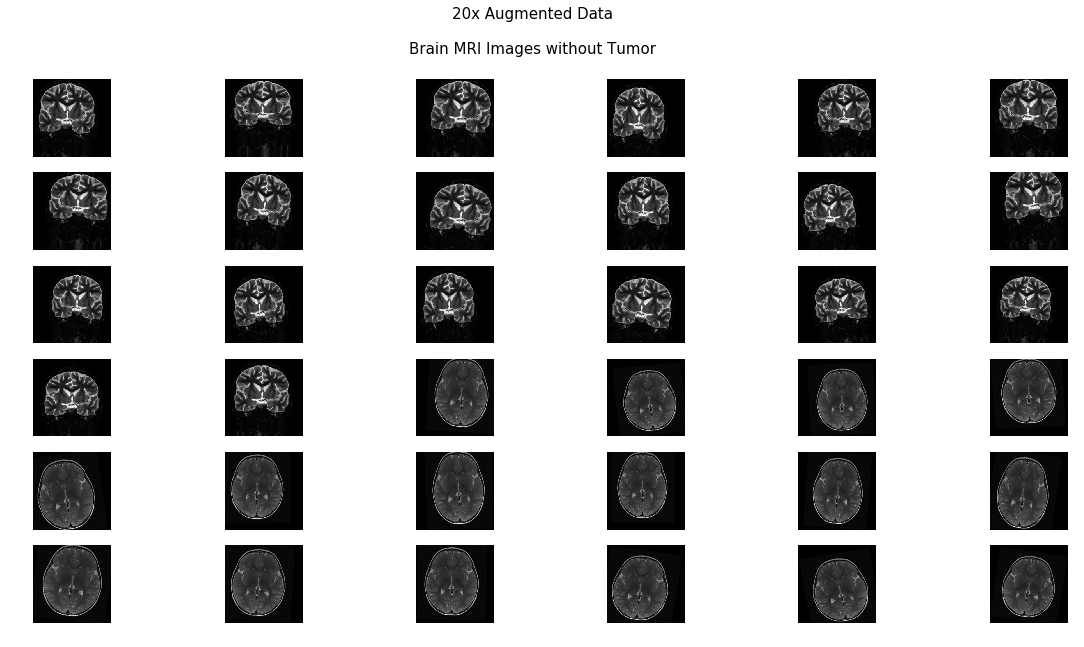

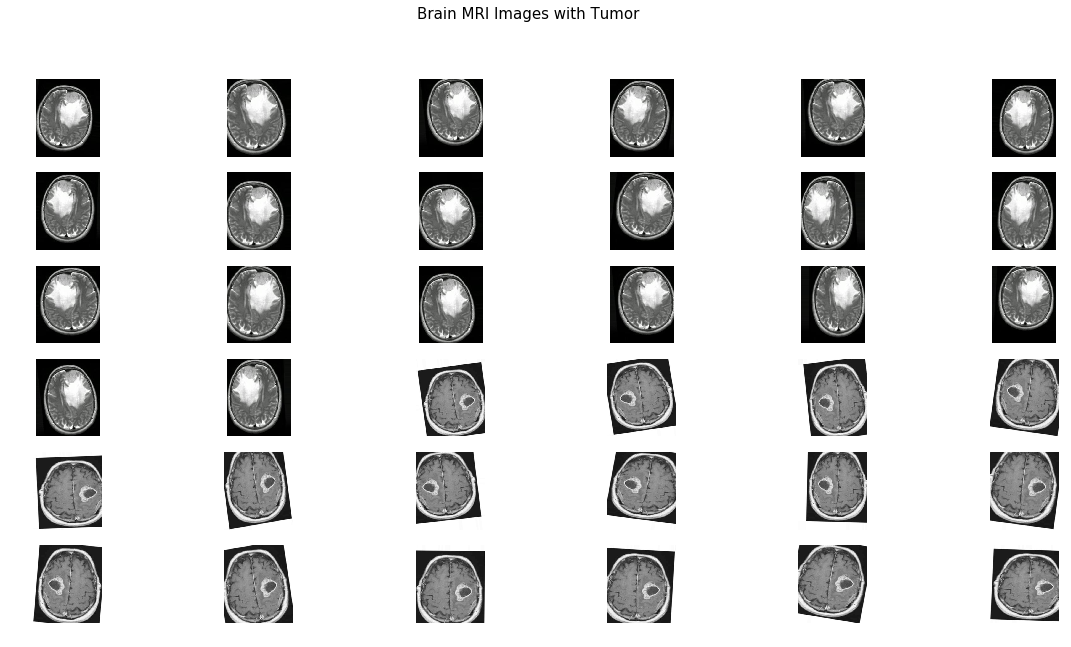

In [3]:
#Augment data 10 times and 20 times and display some images from both the augmented datsets
for aug in aug:
    
    #A for loop to delete any files present in the augmented data directory
    for category in categories:
        for img in os.listdir(os.path.join("Augmented_Data",str(aug)+'x',category)):
            file_path=os.path.join("Augmented_Data",str(aug)+'x',category,img)
            try:
                if os.path.isfile(file_path):
                    os.unlink(file_path)
            except:
                        pass
                    
    #Create an augmented image generator
    datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.1,horizontal_flip=True,shear_range=0.15,rotation_range=10)
    
    #Read the original data and generate augmented images from that original data and save the augmented data in augmented data directory
    for category in categories:
        n=0
        for img in os.listdir(os.path.join("Original_Data",category)):
            n=n+1
            image=cv2.imread(os.path.join("Original_Data",category,img))
            image=np.expand_dims(image,0)
            i=0
            for img in datagen.flow(image,save_to_dir=os.path.join("Augmented_Data",str(aug)+'x',category),save_format='jpg',save_prefix=n):
                i=i+1
                if i==aug:
                    break
        
        #Display some of the images from the augmented dataset
        win=plt.figure(figsize=(20,10))
        if category=='no':
            win.suptitle(str(aug)+'x Augmented Data\n\nBrain MRI Images without Tumor', fontsize=15)
        else:
            win.suptitle("Brain MRI Images with Tumor", fontsize=15)
        index=1
        for img in os.listdir(os.path.join("Augmented_Data",str(aug)+'x',category)):
            image=cv2.imread(os.path.join("Augmented_Data",str(aug)+'x',category,img))
            try:
                win.add_subplot(6,6,index)
                plt.imshow(image)
                plt.axis('off')
                index=index+1
            except:
                break
        plt.show()

Train on 1770 samples, validate on 759 samples
Epoch 1/20
1770/1770 [==============================] - 9s 5ms/step - loss: 0.8723 - acc: 0.6701 - val_loss: 0.5444 - val_acc: 0.7510
Epoch 2/20
1770/1770 [==============================] - 5s 3ms/step - loss: 0.5318 - acc: 0.7571 - val_loss: 0.6883 - val_acc: 0.6746
Epoch 3/20
1770/1770 [==============================] - 5s 3ms/step - loss: 0.4751 - acc: 0.7853 - val_loss: 0.4899 - val_acc: 0.7866
Epoch 4/20
1770/1770 [==============================] - 5s 3ms/step - loss: 0.4453 - acc: 0.7893 - val_loss: 0.5120 - val_acc: 0.7773
Epoch 5/20
1770/1770 [==============================] - 5s 3ms/step - loss: 0.3932 - acc: 0.8203 - val_loss: 0.4680 - val_acc: 0.7931
Epoch 6/20
1770/1770 [==============================] - 5s 3ms/step - loss: 0.3398 - acc: 0.8452 - val_loss: 0.4868 - val_acc: 0.7918
Epoch 7/20
1770/1770 [==============================] - 5s 3ms/step - loss: 0.2962 - acc: 0.8718 - val_loss: 0.4907 - val_acc: 0.7945
Epoch 8/20
1770

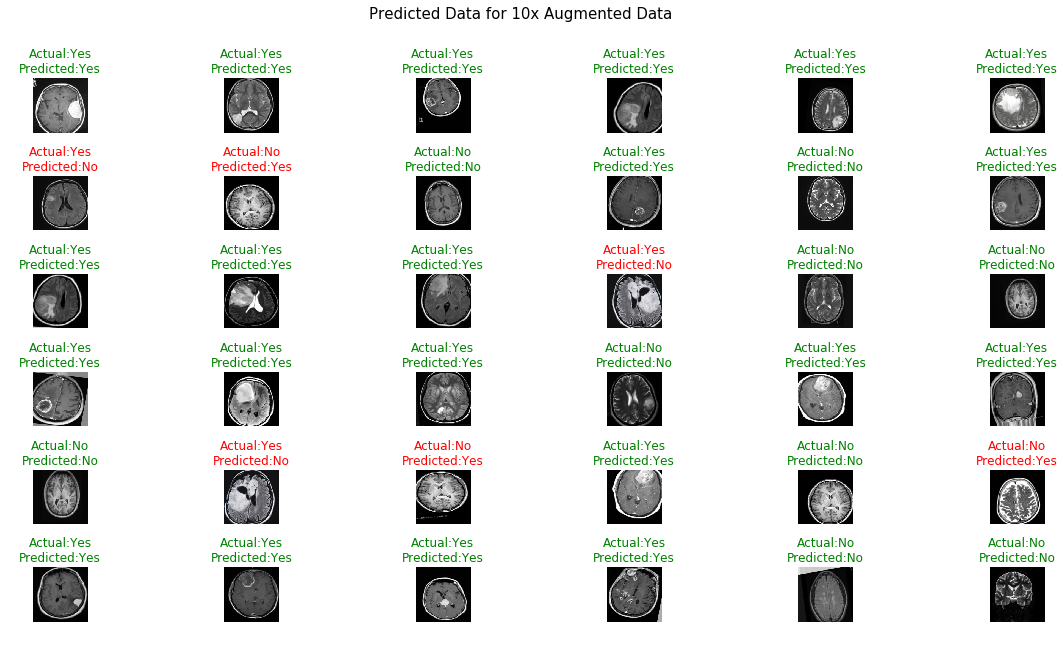

Train on 3537 samples, validate on 1516 samples
Epoch 1/20
3537/3537 [==============================] - 11s 3ms/step - loss: 0.7565 - acc: 0.7229 - val_loss: 0.5157 - val_acc: 0.7632
Epoch 2/20
3537/3537 [==============================] - 10s 3ms/step - loss: 0.4841 - acc: 0.7676 - val_loss: 0.5018 - val_acc: 0.7770
Epoch 3/20
3537/3537 [==============================] - 10s 3ms/step - loss: 0.4220 - acc: 0.8117 - val_loss: 0.4587 - val_acc: 0.8120
Epoch 4/20
3537/3537 [==============================] - 10s 3ms/step - loss: 0.3823 - acc: 0.8256 - val_loss: 0.4140 - val_acc: 0.8133
Epoch 5/20
3537/3537 [==============================] - 10s 3ms/step - loss: 0.3516 - acc: 0.8420 - val_loss: 0.3981 - val_acc: 0.8305
Epoch 6/20
3537/3537 [==============================] - 10s 3ms/step - loss: 0.3045 - acc: 0.8671 - val_loss: 0.4023 - val_acc: 0.8318
Epoch 7/20
3537/3537 [==============================] - 10s 3ms/step - loss: 0.2584 - acc: 0.8934 - val_loss: 0.4306 - val_acc: 0.8397
Epoch 8

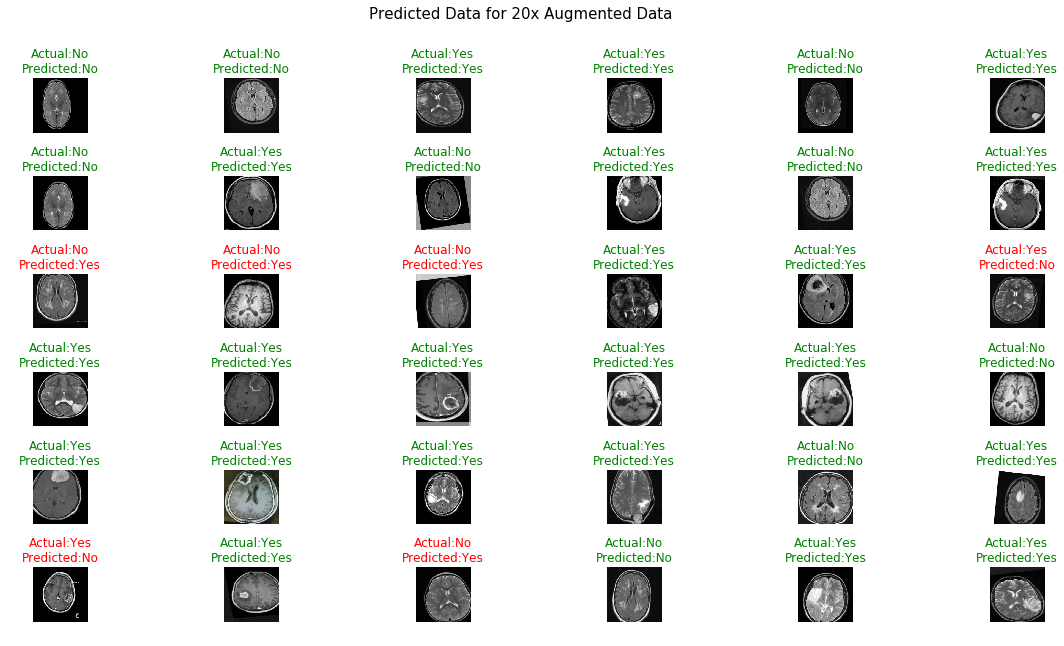

In [6]:
#Initialise lists for f1 score and confusion matrix
f=[]
cm=[]

#Get the f1 score and confusion matrix for 10 times and 20 times augmented data respectively
for aug in aug:
    
    #Intialise two lists one for the images in the dataset and the second for the category of that image
    x=[]
    y=[]
    
    #Append the images and their categories simultaneously to the lists created above
    for category in categories:
        for img in os.listdir(os.path.join("Augmented_Data",str(aug)+'x',category)):
            image=cv2.imread(os.path.join("Augmented_Data",str(aug)+'x',category,img))
            image=cv2.resize(image, (200,200), interpolation = cv2.INTER_AREA)
            x.append(image)
            if category=='no':
                y.append(0)
            else:
                y.append(1)
    
    #Convert the lists into array
    x=np.asarray(x)
    y=np.asarray(y)
    
    #Split the datsets i.e. arrays x and y into training and testing
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
    
    #Create Model
    model=Sequential()
    
    #Create Model Layers
    model.add(Convolution2D(32,(3,3),input_shape=(200,200,3),activation="relu"))  
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(32,(3,3),input_shape=(200,200,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(32,(3,3),input_shape=(200,200,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.5))
    
    model.add(Flatten()) 
    
    model.add(Dense(units=32,activation='relu'))
    
    model.add(Dense(units=32,activation='relu'))
    
    model.add(Dense(units=32,activation='relu'))
    
    model.add(Dense(units=1,activation="sigmoid"))
    
    #Compile model using accuracy to measure model performance
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    #Training the model
    model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))
    
    #Predicting the values for test dataset
    y_pred = model.predict(x_test)
    y_pred=y_pred.round()
    y_pred=y_pred.astype(int)
    
    #Calculating f1 score and confusion matrix
    f.append(f1_score(y_test,y_pred))
    cm.append(confusion_matrix(y_test,y_pred))
    
    #Display some images and show their actual and predicted category
    win=plt.figure(figsize=(20,10))
    win.suptitle('Predicted Data for '+str(aug)+'x Augmented Data',fontsize=15)
    win.subplots_adjust(hspace=0.8)
    for index in range(36):
        sub=win.add_subplot(6,6,index+1)
        sub.axis('off')
        a=random.randint(0,len(x_test)-1)
        sub.imshow(x_test[a])
        sub.set_title("Actual:{}\nPredicted:{}".format(categories[int(y_test[a])].title(),categories[int(y_pred[a])].title()),color=("green" if int(y_pred[a])==int(y_test[a]) else "red"))
    plt.show()

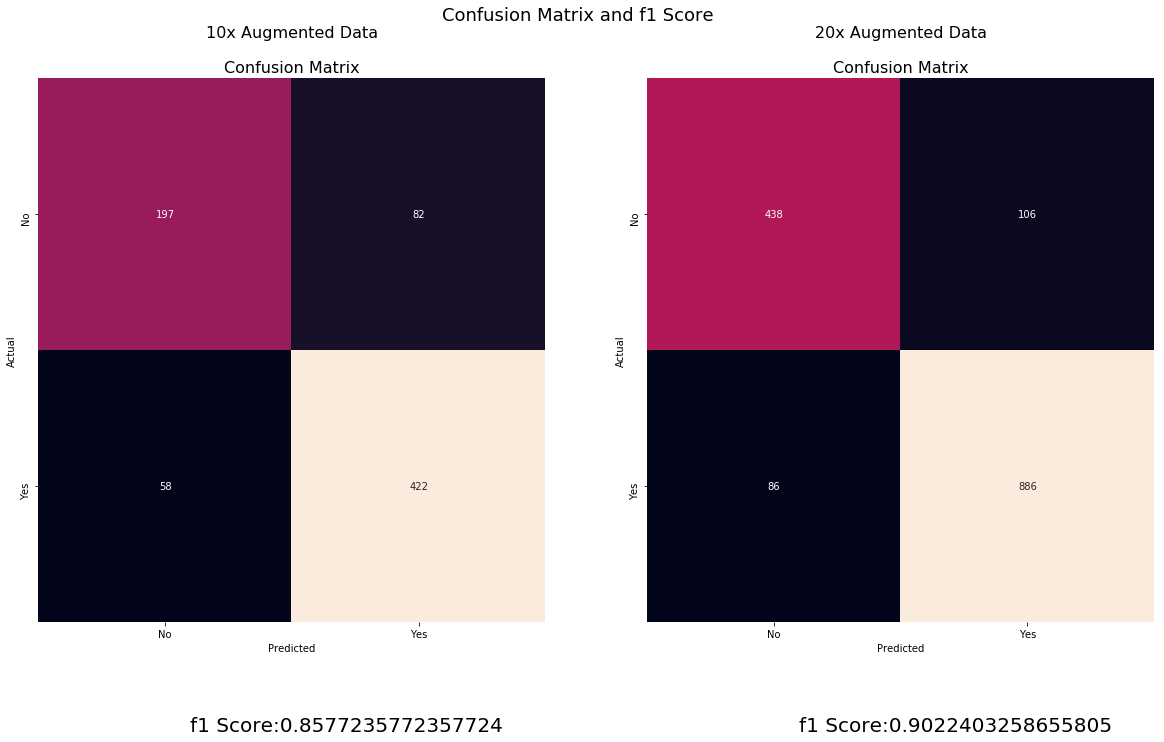

In [7]:
#Convert both the lists to array 
f=np.asarray(f)
cm=np.asarray(cm)

#Plot a figure in matplotlib and set the window title
win=plt.figure(figsize=(20,10))
win.suptitle('Confusion Matrix and f1 Score',fontsize=18)

#Display confusion matrix and f1 score for both 10 times and 20 times Augmented Data in the figure plotted abbove
for i in range(2):
	sub= win.add_subplot(1,2,i+1)
	sb.heatmap(cm[i], annot=True, fmt='d',cbar=False)
	sub.set_xlabel('Predicted')
	sub.set_ylabel('Actual')
	sub.set_title(str((i+1)*10)+'x Augmented Data\n\nConfusion Matrix',fontsize=16)
	sub.xaxis.set_ticklabels(['No', 'Yes'])
	sub.yaxis.set_ticklabels(['No', 'Yes'])
	if i==0:
		sub.text(0.6,2.4,'f1 Score:{}'.format(f[i]),fontsize=20)
	else:
		sub.text(0.6,2.4,'f1 Score:{}'.format(f[i]),fontsize=20)
plt.show()